# Summary

 1. Topological properties can be taken from Chi indexes (pay attention to number of rings formula!) [3-14]
 2. There is [SlogP_VSA](MOE-type%20descriptors%20using%20LogP%20contributions%20and%20surface%20area%20contributions%20http://www.chemcomp.com/journal/vsadesc.htm) descriptors [92-103] - not exactly logP, but some property, depending on logP value
 3. In the  [Hall](https://onlinelibrary.wiley.com/doi/10.1002/9780470125793.ch9) article Alpha is described as weight dependent on the atom radius so to change AtomCount parameters. Interestingly that Alpha = 0 for C(sp3), \>0 for P, S, Cl, Br, I and \<0 for C, N, O, FI
 4. Ipc descriptor [34] has information about coefficients of characteristic polynomial of adjacency matrix, which may refer to symmetry (?)
 5. Kappa1,2,3 [35-37] refer to shape of molecule and more complex patterns that just simplicity (star-like for example), probably we can check errors for molecules with different kappas too
 6. MolLogP [47] - property of calculated logP based on summation ofweights for 68 atom groups (dataset of 9920 molecules, with r(2) = 0.918 ), by  [Wildman](https://www.researchgate.net/publication/220524632_Prediction_of_Physicochemical_Parameters_by_Atomic_Contributions)
 7. Properties 52-66 contain number of different rings/cycles in molecule
 8. [66] - # valence electron (probably they are all 0s?)
 9. [15-25], [67-80], [92-103] MOE-VSA descriptors - not clear, what it exactly is and is it needed property
10. There are number of specific fragments features [115-199], which can be similar to parts of molecules which activate bit of NFp in terms of common sense
11. [200] - drug-likeness property is quite interesting in terms of drop molecules which are not used on pharmacology



# Proposals

1. Run prediction model like for Morgan FP, but for these 200 features
2. Calculate p-value for good/bad predictions on test dataset for these 200 features (especially for properties with calculated logP)
3. Number of specific fragments in [115-199] can be checked for good/bad molecule statistics so to check, which fragments are important for logP

# Statistics for D-MPNN test predictions

* After getting 200 best and 200 worst molecules, 108 out of 200 features appeared to be the same, so they were removed from further analysis
* Most of left 92 features has very low values of p-value from kruskal statistics (less then 0.01)
  ![](image10.png)
* 20 features with lowest p-value are presented in the following table
* Obviously graph topological descriptors (Chi, Kappa) are on the top, NumValenceElectrons seems strange, but interesting and needs further investigation

|  | Feature name | P-value |
| --- | --- | --- |
| 0 | Kappa1 | 8.25365e-14 |
| 1 | Chi2n | 1.24678e-13 |
| 2 | Chi1n | 1.3659e-13 |
| 3 | NumValenceElectrons | 1.56867e-13 |
| 4 | Chi0n | 2.40821e-13 |
| 5 | SlogP_VSA2 | 2.89531e-13 |
| 6 | Chi0 | 4.56501e-13 |
| 7 | Kappa2 | 4.57266e-13 |
| 8 | Chi1v | 8.75585e-13 |
| 9 | HeavyAtomCount | 1.12934e-12 |
| 10 | Chi0v | 1.47328e-12 |
| 11 | Chi1 | 1.79236e-12 |
| 12 | LabuteASA | 2.34751e-12 |
| 13 | Chi3n | 2.55963e-12 |
| 14 | Chi4n | 3.64599e-12 |
| 15 | ExactMolWt | 8.85466e-12 |
| 16 | MolWt | 1.02301e-11 |
| 17 | MolMR | 1.1569e-11 |
| 18 | Chi2v | 1.6552e-11 |
| 19 | HeavyAtomMolWt | 3.46084e-11 |

# Features description

| # | Feature name | RDKit module | Article | Short description |
| --- | --- | --- | --- | --- |
| 1 | BalabanJ | rdkit.Chem.**GraphDescriptors** | [Balaban](https://www.sciencedirect.com/science/article/abs/pii/0009261482800092) | A new topological index *J* (based on distance sums *si* as graph invariants) is proposed. For unsaturated or aromatic compounds, fractional bond orders are used in calculating *si*. The degeneracy of *J* is lowest among all single topological indices described so far. The asymptotic behaviour of *J* is discussed, e.g. when *n* → ∞ in C*n*H2*n* = 2,*J*ar π for linear alkanes, and*J* → ∞ for highly branched ones. |
| 2 | BertzCT | rdkit.Chem.**GraphDescriptors** | [Bertz](https://pubs.acs.org/doi/10.1021/ja00402a071) | A topological index meant to quantify “complexity” of molecules.<br/>Consists of a sum of two terms, one representing the complexity of the bonding, the other representing the complexity of the distribution of heteroatoms. |
| —- | Chi | rdkit.Chem.**GraphDescriptors** | [Hall](https://onlinelibrary.wiley.com/doi/10.1002/9780470125793.ch9) | A chi index is a weighted count of a given type of subgraph. There are two attributes of each index, the order and the type. The order, m, of a chi index is the number of graph edges in the corresponding subgraph. The type, t, refers to the particular arrangement of the edges in the subgraph such as Path (P), Cluster (C), Path/Cluster (PC), and Ring (CH) |
| 3-5 | Chi0,<br/>Chi0n,<br/>Chi0v |  |  | ![](image1.png)<br/>![](image2.png)<br/>![](image3.png)<br/>Chi0 - sum over **atoms**<br/>Low level of structure info, only the fact of the presence of the nearest neighbor to each atom is encoded. v - valence, n - v, but uses nVal instead of valence. This makes a big difference after we get out of the first row |
| 6-8 | Chi1,<br/>Chi1n,<br/>Chi1v |  |  | The immediate bonding environment of each atom is encoded by virtue of the edge weight. Further, the number of terms in the sum, P, is dependent on the graph type, especially on the number of cycles or rings. The index encodes both the atom identities as well as the connectedness in the molecular skeleton.<br/><br/>![](image4.png)<br/>Chi1 - sum over **edges**<br/>For acyclic molecules #edges = #atoms -1<br/>For rings #ringsR = #edges + 1 - #atoms<br/><br/>The Chi1v  index encodes both the atom identities as well as the connectedness in the molecular skeleton |
| 9-14 | Chi2n,<br/>Chi2v,<br/>Chi3n,<br/>Chi3v,<br/>Chi4n,<br/>Chi4v |  |  | For the order m\>2 there are several types of subgraphs: Path, Cluster, Path/Cluster, and Chain. For the third order, however, there is no PathICluster type. Each type of index is defined in a manner analogous to the lower order indexes as a product of reciprocal square roots.<br/>![](image5.png)<br/>each subgraph encodes the constitutive nature of the graph. The Chi indexes represent the whole graph. Each is composed of terms from the various parts of the graph, but the summation covers the whole graph. In this manner each index encodes in a particular manner the structure information resident in the molecular skeleton. |
| 26 | ExactMolWt | rdkit.Chem.**Descriptors** |  | The exact molecular weight of the molecule |
| 27-29 | FpDensityMorgan1<br/>FpDensityMorgan2<br/>FpDensityMorgan3 | rdkit.Chem.**Descriptors** |  | Morgan fingerprint, radius 1,2,3<br/>Density - ? |
| 30 | FractionCSP3 | rdkit.Chem.**Lipinski** |  | Returns the fraction of C atoms that are SP3 hybridized |
| 31 | HallKierAlpha |  | [Hall](https://onlinelibrary.wiley.com/doi/10.1002/9780470125793.ch9) | A non-C( sp3) atom, counted in arriving at the value of A for the molecular graph, is contributing more or less than than C(sp3) contribution to the shape. Therefore, that particular atom should be counted more or less than 1, the increment or decrement called Alpha, which is based on the size contribution of the atom in question relative to C(sp3).<br/>![](image6.png) |
| 32 | HeavyAtomCount | rdkit.Chem.**Lipinski** |  | Number of heavy atoms in a molecule |
| 33 | HeavyAtomMolWt | rdkit.Chem.**Descriptors** |  | The average molecular weight of the molecule ignoring hydrogens |
| 34 | Ipc | rdkit.Chem.**GraphDescriptors** |  | This returns the information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrogen-suppressed graph of a molecule. |
|  | Kappa | rdkit.Chem.**GraphDescriptors** | [Hall](https://onlinelibrary.wiley.com/doi/10.1002/9780470125793.ch9) | Shape attribute, based on number of pathes of length 1,2,3 (number of bonds in path).<br/>Kappa1 may define whether there are cycles in molecules or not<br/><br/>Described by means of number of path of particular order and number of atoms in molecule<br/>![](image7.png)<br/>![](image8.png)<br/>![](image9.png) |
| 35 | Kappa1 |  |  | A range of Kappa1 values is shown for structures ranging from a linear structure to one with A maximum number of cycles. The structural inforination encoded in Kappa1 is related to the complexity, or more precisely, the “**cyclicity”** of a molecule. All acyclic structures with six atoms would have Kappa1 = 6.000, or, in general, Kappa1 = A for acyclic structures. |
| 36 | Kappa2 |  |  | the structures reveal that information is encoded relating to the degree of **star graph-likeness and linear graph-likeness** |
| 37 | Kappa3 |  |  | Values are larger when branching is nonexistent or when it is located at the extremities of a graph. We can say that Kappa3 encodes information about the **centrality of branching**. |
| 38 | LabuteASA | rdkit.Chem.**MolSurf** |  | Labute's Approximate Surface Area |
| 39,<br/>41,<br/>43,<br/>45 | MaxAbsEStateIndex,<br/>MinAbsEStateIndex,<br/>MaxEStateIndex,<br/>MinEStateIndex | rdkit.Chem.**EState.EState** | [Kier](https://pubmed.ncbi.nlm.nih.gov/2235877/) | Electrotopological State Indices in which both electronic and topological properties are combined |
| 40,<br/>42,<br/>44,<br/>46 | MaxAbsPartialCharge,<br/>MinAbsPartialCharge<br/>MaxPartialCharge,<br/>MinPartialCharge | rdkit.Chem.**Descriptors** |  | A partial charge is a non-integer charge value when measured in elementary charge units. Partial charge is more commonly called net atomic charge. It is represented by the Greek lowercase letter δ, namely δ− or δ+. Partial charges are created due to the asymmetric distribution of electrons in chemical bonds. |
| 47 | MolLogP | rdkit.Chem.**Crippen** | [Wildman](https://www.researchgate.net/publication/220524632_Prediction_of_Physicochemical_Parameters_by_Atomic_Contributions) | Atom-based calculation of LogP and MR using Crippen’s approach (atoms are divided into 68 types, each has it's own contribution as weight to the final summation for calculating logP)<br/>Dataset - 9920 molecules, with r(2) = 0.918 |
| 48 | MolMR | rdkit.Chem.**Crippen** | [Wildman](https://www.researchgate.net/publication/220524632_Prediction_of_Physicochemical_Parameters_by_Atomic_Contributions) | Molar refractivity calculated by means of an atom-based scheme |
| 49 | MolWt | rdkit.Chem.**Descriptors** |  | The average molecular weight of the molecule |
| 50,<br/>51 | NHOHCount<br/>NOCount | rdkit.Chem.**Lipinski** |  | Number of NHs or OHs, Number of Nitrogens and Oxygens |
| 52-60,<br/>62-65 | NumAliphaticCarbocycles,<br/>NumAliphaticHeterocycles,<br/>NumAliphaticRings,<br/>NumAromaticCarbocycles,<br/>NumAromaticHeterocycles,<br/>NumAromaticRings,<br/>NumHAcceptors,<br/>NumHDonors,<br/>NumHeteroatoms,<br/>NumRotatableBonds,<br/>NumSaturatedCarbocycles,<br/>NumSaturatedHeterocycles,<br/>NumSaturatedRings | rdkit.Chem.**Lipinski** |  | #aliphatic (containing at least one non-aromatic bond) carbocycles,<br/>#aliphatic (containing at least one non-aromatic bond) heterocycles,<br/>#aliphatic (containing at least one non-aromatic bond) rings,<br/>#aromatic carbocycles,<br/>#aromatic heterocycles,<br/>#aromatic rings,<br/>#Hydrogen Bond Acceptors,<br/>#Hydrogen Bond Donors,<br/>#Heteroatoms,<br/>#Rotatable Bonds,<br/>#Saturated carbocycles,<br/>#saturated heterocycles,<br/>#saturated rings |
| 61,66 | NumRadicalElectrons,<br/>NumValenceElectrons | rdkit.Chem.**Descriptors** |  | #radical electrons the molecule has (says nothing about spin state)<br/>#valence electrons (?) |
| 81 | RingCount | rdkit.Chem.**Lipinski** |  | #rings (I suppose they are calculated by formula of number of cycles in graph) |
| 104 | TPSA | rdkit.Chem.**Descriptors** | [Ertl](https://pubs.acs.org/doi/abs/10.1021/jm000942e) | Topological polar surface area.<br/>The RDKit’s TPSA implementation only includes, by default, contributions from N and O atoms.<br/>Surface belonging to polar atoms, is a descriptor that was shown to correlate well with passive molecular transport through membranes and, therefore, allows prediction of transport properties of drugs. |
| 200 | qed | rdkit.Chem.**QED** |  | QED stands for quantitative estimation of drug-likeness<br/><br/>Calculate the weighted sum of ADS mapped properties |
| 67-80 | PEOE_VSA1,<br/>PEOE_VSA10,<br/>PEOE_VSA11,<br/>PEOE_VSA12,<br/>PEOE_VSA13,<br/>PEOE_VSA14,<br/>PEOE_VSA2,<br/>PEOE_VSA3,<br/>PEOE_VSA4,<br/>PEOE_VSA5,<br/>PEOE_VSA6,<br/>PEOE_VSA7,<br/>PEOE_VSA8,<br/>PEOE_VSA9 | rdkit.Chem.**MolSurf** |  | MOE Charge VSA Descriptor |
| 82-91 | SMR_VSA1,<br/>SMR_VSA10,<br/>SMR_VSA2,<br/>SMR_VSA3,<br/>SMR_VSA4,<br/>SMR_VSA5,<br/>SMR_VSA6,<br/>SMR_VSA7,<br/>SMR_VSA8,<br/>SMR_VSA9 | rdkit.Chem.**MolSurf** |  | MOE MR(Molar refractivity) VSA Descriptor |
| 92-103 | SlogP_VSA1,<br/>SlogP_VSA10,<br/>SlogP_VSA11,<br/>SlogP_VSA12,<br/>SlogP_VSA2,<br/>SlogP_VSA3,<br/>SlogP_VSA4,<br/>SlogP_VSA5,<br/>SlogP_VSA6,<br/>SlogP_VSA7,<br/>SlogP_VSA8,<br/>SlogP_VSA9 | rdkit.Chem.**MolSurf** |  | MOE logP VSA Descriptor |
| 15-25 | EState_VSA1<br/>EState_VSA10<br/>EState_VSA11<br/>EState_VSA2<br/>EState_VSA3<br/>EState_VSA4<br/>EState_VSA5<br/>EState_VSA6<br/>EState_VSA7<br/>EState_VSA8<br/>EState_VSA9 | rdkit.Chem.**EState.EState_VSA** | MOE-type descriptors using [EState](https://www.rdkit.org/docs/GettingStartedInPython.html) indices and surface area contributions (developed at RD, not described in the CCG paper) | The Subdivided Surface Areas are descriptors based on an approximate accessible van der Waals surface area (in Å2) calculation for each atom, *vi* along with some other atomic property, *pi*. The *vi* are calculated using a connection table approximation. Each descriptor in a series is defined to be the sum of the *vi* over all atoms *i* such that *pi* is in a specified range (*a*,*b*).<br/><br/> |
| 105-114 | VSA_EState1,<br/>VSA_EState10,<br/>VSA_EState2,<br/>VSA_EState3,<br/>VSA_EState4,<br/>VSA_EState5,<br/>VSA_EState6,<br/>VSA_EState7,<br/>VSA_EState8,<br/>VSA_EState9 | rdkit.Chem.**EState.EState_VSA** |  | VSA EState Descriptor for range of EState values larger [15-25] |
|  | Fragments | rdkit.Chem.**Fragments** |  | #of specific fragments |
| 115-133 | fr_Al_COO,<br/>fr_Al_OH,<br/>fr_Al_OH_noTert,<br/>fr_ArN,<br/>fr_Ar_COO,<br/>fr_Ar_N,<br/>fr_Ar_NH,<br/>fr_Ar_OH,<br/>fr_COO,<br/>fr_COO2,<br/>fr_C_O,<br/>fr_C_O_noCOO,<br/>fr_C_S,<br/>fr_HOCCN,<br/>fr_Imine,<br/>fr_NH0,<br/>fr_NH1,<br/>fr_NH2,<br/>fr_N_O |  |  | #aliphatic carboxylic acids,<br/>#aliphatic hydroxyl groups,<br/>#aliphatic hydroxyl groups excluding tert-OH,<br/>#N functional groups attached to aromatics,<br/>#aromatic amines,<br/>#aromatic hydroxyl groups,<br/>#carboxylic acids,<br/>#carboxylic acids,<br/>#carbonyl O,<br/>#carbonyl O, excluding COOH,<br/>#thiocarbonyl,<br/>#C(OH)CCN-Ctert-alkyl or C(OH)CCNcyclic,<br/>#Imines,<br/>#Tertiary amines,<br/>#Secondary amines,<br/>#Primary amines,<br/>#hydroxylamine groups |
| 134-152 | fr_Ndealkylation1,<br/>fr_Ndealkylation2,<br/>fr_Nhpyrrole,<br/>fr_SH,<br/>fr_aldehyde,<br/>fr_alkyl_carbamate,<br/>fr_alkyl_halide,<br/>fr_allylic_oxid,<br/>fr_amide,<br/>fr_amidine,<br/>fr_aniline,<br/>fr_aryl_methyl,<br/>fr_azide,<br/>fr_azo,<br/>fr_barbitur,<br/>fr_benzene,<br/>fr_benzodiazepine,<br/>fr_bicyclic,<br/>fr_diazo |  |  | #XCCNR groups,<br/>#tert-alicyclic amines (no heteroatoms, not quinine-like bridged N),<br/>#H-pyrrole nitrogens,<br/>#thiol groups,<br/>#aldehydes,<br/>#alkyl carbamates (subject to hydrolysis),<br/>#alkyl halides,<br/>#allylic oxidation sites excluding steroid dienone,<br/>#amides,<br/>#amidine groups,<br/>#anilines,<br/>#methyl sites for hydroxylation,<br/>#azide groups,<br/>#azo groups,<br/>#barbiturate groups,<br/>#benzene rings,<br/>#benzodiazepines with no additional fused rings,<br/>Bicyclic,<br/>#diazo groups |
| 153-171 | fr_dihydropyridine,<br/>fr_epoxide,<br/>fr_ester,<br/>fr_ether,<br/>fr_furan,<br/>fr_guanido,<br/>fr_halogen,<br/>fr_hdrzine,<br/>fr_hdrzone,<br/>fr_imidazole,<br/>fr_imide,<br/>fr_isocyan,<br/>fr_isothiocyan,<br/>fr_ketone,<br/>fr_ketone_Topliss,<br/>fr_lactam,<br/>fr_lactone,<br/>fr_methoxy,<br/>fr_morpholine |  |  | #dihydropyridines,<br/>#epoxide rings,<br/>#esters,<br/>#ether oxygens (including phenoxy),<br/>#furan rings,<br/>#guanidine groups,<br/>#halogens,<br/>#hydrazine groups,<br/>#hydrazone groups,<br/>#imidazole rings,<br/>#imide groups,<br/>#isocyanates,<br/>#isothiocyanates,<br/>#ketones,<br/>#ketones excluding diaryl, a,b-unsat. dienones, heteroatom on Calpha,<br/>#beta lactams,<br/>#cyclic esters (lactones),<br/>#methoxy groups -OCH3,<br/>#morpholine rings |
| 172-199 | fr_nitrile,<br/>fr_nitro,<br/>fr_nitro_arom,<br/>fr_nitro_arom_nonortho,<br/>fr_nitroso,<br/>fr_oxazole,<br/>fr_oxime,<br/>fr_para_hydroxylation,<br/>fr_phenol,<br/>fr_phenol_noOrthoHbond,<br/>fr_phos_acid,<br/>fr_phos_ester,<br/>fr_piperdine,<br/>fr_piperzine,<br/>fr_priamide,<br/>fr_prisulfonamd,<br/>fr_pyridine,<br/>fr_quatN,<br/>fr_sulfide,<br/>fr_sulfonamd,<br/>fr_sulfone,<br/>fr_term_acetylene,<br/>fr_tetrazole,<br/>fr_thiazole,<br/>fr_thiocyan,<br/>fr_thiophene,<br/>fr_unbrch_alkane,<br/>fr_urea |  |  | #nitriles,<br/>#nitro groups,<br/>#nitro benzene ring substituents,<br/>#non-ortho nitro benzene ring substituents,<br/>#nitroso groups, excluding NO2,<br/>#oxazole rings,<br/>#oxime groups,<br/>#para-hydroxylation sites,<br/>#phenols,<br/>#phenolic OH excluding ortho intramolecular Hbond substituents,<br/>#phosphoric acid groups,<br/>#phosphoric ester groups,<br/>#piperdine rings,<br/>#piperzine rings,<br/>#primary amides,<br/>#primary sulfonamides,<br/>#pyridine rings,<br/>#quarternary nitrogens,<br/>#thioether,<br/>#sulfonamides,<br/>#sulfone groups,<br/>#terminal acetylenes,<br/>#tetrazole rings,<br/>#thiazole rings,<br/>#thiocyanates,<br/>#thiophene rings,<br/>#unbranched alkanes of at least 4 members (excludes halogenated alkanes),<br/>#urea groups |



# Compute RDKit features and predictions

In [28]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
from descriptastorus.descriptors import rdNormalizedDescriptors
from rdkit import Chem
import logging

# make the normalized descriptor generator
generator = rdNormalizedDescriptors.RDKit2DNormalized()
generator.columns # list of tuples:  (descriptor_name, numpytype) ...

# features = generator.process(smiles)
# features[0] is True/False if the smiles could be processed correcty
# features[1:] are the normalized descriptors as described in generator.columns

# example for converting a smiles string into the values
def rdkit_2d_normalized_features(smiles: str):
    # n.b. the first element is true/false if the descriptors were properly computed
    results = generator.process(smiles)
    processed, features = results[0], results[1:]
    if processed is None:
       logging.warning("Unable to process smiles %s", smiles)
    # if processed is None, the features are are default values for the type
    return features

In [1]:
RAW_PATH = '../../../data/raw/baselines/dmpnn'

In [8]:
with open(os.path.join(RAW_PATH,'RDKit200features.txt'),'w') as f:
    f.write('\n'.join([feature[0] for feature in generator.columns]))

In [5]:
ERROR_COLUMN = 'Absolute Error'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'
PREDS_COLUMN = 'logP_pred'

DATASET_INPUT_PATH = '../../../data/4_best_baselines_predictions/dmpnn'

DATASET_OUTPUT_PATH = '../../../data/raw/baselines/dmpnn'

In [9]:
test_predictions = pd.read_csv(os.path.join(DATASET_INPUT_PATH, 'logp_wo_averaging_test_preds.csv'))

In [29]:
rdkit_table = []
features_names = [gen[0] for gen in generator.columns]
for i in tqdm(range(test_predictions.shape[0])):
    smiles = test_predictions.iloc[i][SMILES_COLUMN]
    logP = test_predictions.iloc[i][VALUE_COLUMN]
    logP_pred = test_predictions.iloc[i][PREDS_COLUMN]
    features = {features_names[j]:feature for j,feature in enumerate(rdkit_2d_normalized_features(smiles))}
    features[SMILES_COLUMN] = smiles
    features[VALUE_COLUMN] = logP
    features[PREDS_COLUMN] = logP_pred
    features[ERROR_COLUMN] = np.abs(logP-logP_pred)
    rdkit_table.append(features)

100%|██████████| 2067/2067 [02:49<00:00, 12.20it/s]


In [30]:
test_rdkit_features = pd.DataFrame(rdkit_table)

In [34]:
test_rdkit_features = test_rdkit_features.sort_values(by=ERROR_COLUMN)

In [35]:
test_rdkit_features.to_csv(os.path.join(DATASET_OUTPUT_PATH, 'predictions_with_rdkit_features.csv'), index = False)

# Get worst stats

In [44]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [41]:
ERROR_COLUMN = 'Absolute Error'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'
PREDS_COLUMN = 'logP_pred'

DATA_PATH = '../../../data/raw/baselines/dmpnn'

In [42]:
with open(os.path.join(DATA_PATH,'RDKit200features.txt'),'r') as f:
    feature_names = f.read().split('\n')

In [46]:
compare_data_with_stats = pd.read_csv(os.path.join(DATA_PATH,'predictions_with_rdkit_features.csv'))

In [50]:
NUMBER_OF_BEST = 200
NUMBER_OF_WORST = 200

In [51]:
best_n_vals = compare_data_with_stats.iloc[:NUMBER_OF_BEST]

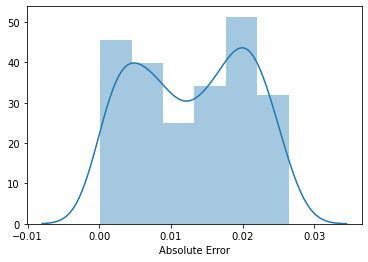

In [84]:
sns.distplot(best_n_vals[ERROR_COLUMN])

In [52]:
worst_n_vals = compare_data_with_stats.iloc[-NUMBER_OF_WORST:].sort_values(by=ERROR_COLUMN, ascending = False)

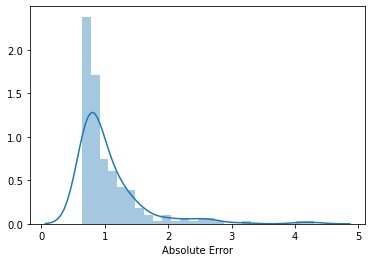

In [83]:
sns.distplot(worst_n_vals[ERROR_COLUMN])

In [94]:
p_values = []
for feature_name in tqdm(feature_names):
    if len(list(set(np.unique(best_n_vals[feature_name])) - set(np.unique(worst_n_vals[feature_name]))))==0:
        print (feature_name)
        continue
    p_value = stats.kruskal(best_n_vals[feature_name], worst_n_vals[feature_name]).pvalue
    p_values.append({'Feature name':feature_name, 'P-value':p_value})

100%|██████████| 200/200 [00:00<00:00, 1496.33it/s]

EState_VSA11
Ipc
NHOHCount
NOCount
NumAliphaticHeterocycles
NumAromaticCarbocycles
NumAromaticHeterocycles
NumAromaticRings
NumHAcceptors
NumHDonors
NumRadicalElectrons
NumRotatableBonds
NumSaturatedCarbocycles
NumSaturatedHeterocycles
RingCount
SMR_VSA2
SMR_VSA8
SlogP_VSA11
SlogP_VSA9
VSA_EState1
VSA_EState2
VSA_EState3
VSA_EState4
VSA_EState5
VSA_EState6
VSA_EState7
fr_Al_COO
fr_Al_OH
fr_Al_OH_noTert
fr_ArN
fr_Ar_COO
fr_Ar_N
fr_Ar_NH
fr_Ar_OH
fr_COO
fr_COO2
fr_C_O
fr_C_O_noCOO
fr_C_S
fr_HOCCN
fr_Imine
fr_NH0
fr_NH1
fr_NH2
fr_N_O
fr_Ndealkylation1
fr_Ndealkylation2
fr_Nhpyrrole
fr_SH
fr_aldehyde
fr_alkyl_carbamate
fr_allylic_oxid
fr_amide
fr_amidine
fr_aniline
fr_aryl_methyl
fr_azide
fr_barbitur
fr_benzene
fr_bicyclic
fr_diazo
fr_dihydropyridine
fr_epoxide
fr_ester
fr_ether
fr_furan
fr_guanido
fr_hdrzine
fr_hdrzone
fr_imidazole
fr_imide
fr_isocyan
fr_isothiocyan
fr_ketone_Topliss
fr_lactone
fr_methoxy
fr_morpholine
fr_nitrile
fr_nitro
fr_nitro_arom
fr_nitro_arom_nonortho
fr_nitroso
fr

In [54]:
stats.kruskal(best_n_vals[feature_names[0]], worst_n_vals[feature_names[0]]).pvalue

5.30859240180259e-06

In [95]:
p_values = pd.DataFrame(p_values).sort_values(by='P-value').dropna().reset_index().drop(columns=['index'])

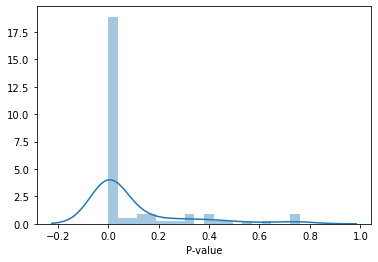

In [96]:
sns.distplot(p_values['P-value'])

In [100]:
with open(os.path.join(DATA_PATH,'experiments_result'),'w') as f:
    f.write(p_values[:20].to_markdown())

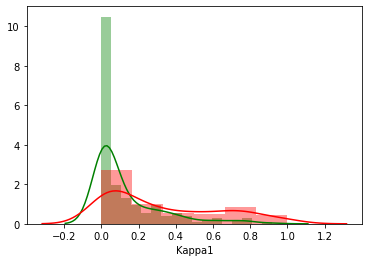

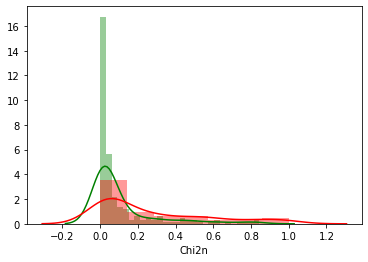

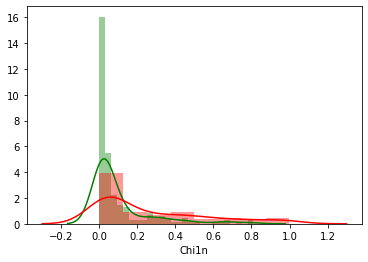

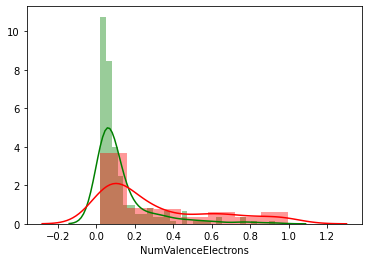

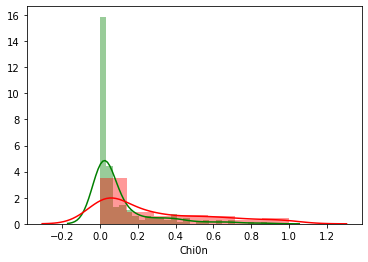

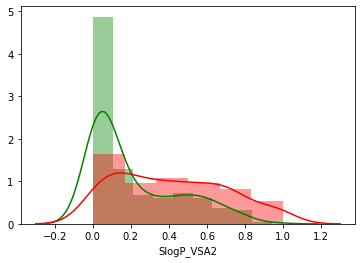

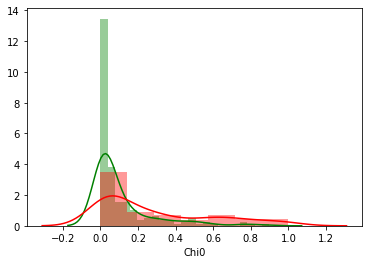

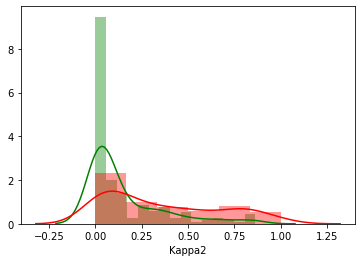

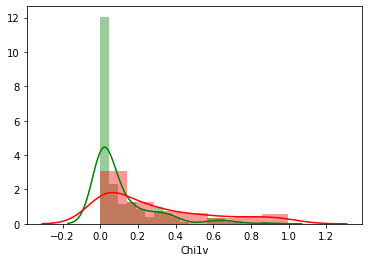

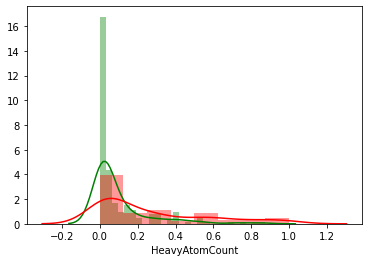

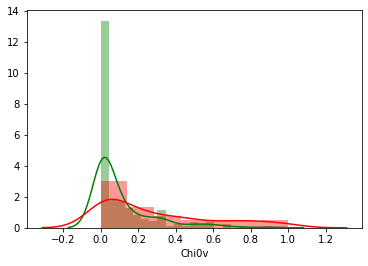

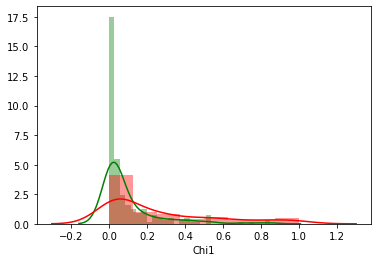

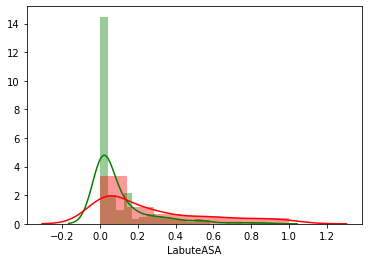

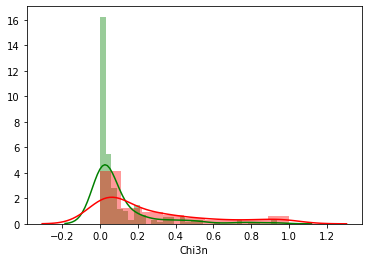

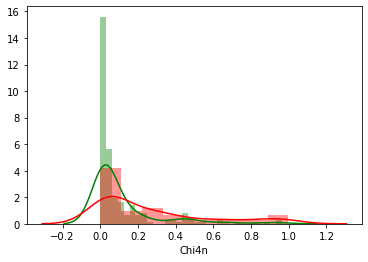

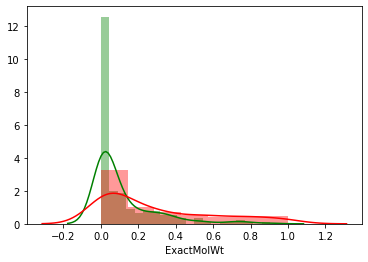

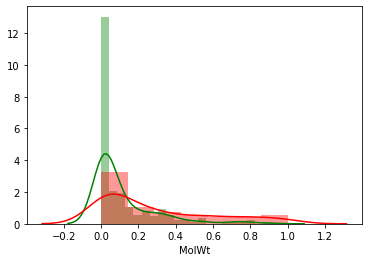

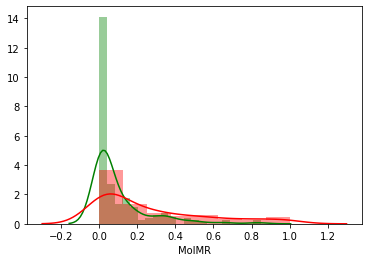

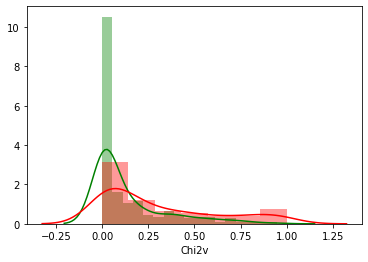

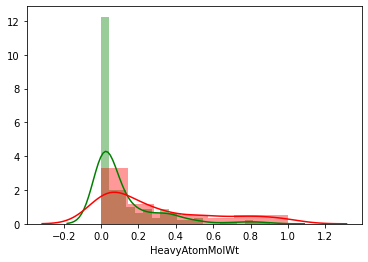

In [102]:
for i in range(20):
    feature_name = p_values.iloc[i]['Feature name']
    sns.distplot(best_n_vals[feature_name], color='g')
    sns.distplot(worst_n_vals[feature_name], color='r')
    plt.show()